## Observations and Insights 

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouseDataFile = "data/Mouse_metadata.csv"
studyDataFile = "data/Study_results.csv"

# Read the mouse data and the study results
mouseData = pd.read_csv(mouseDataFile)
studyData = pd.read_csv(studyDataFile)

# Combine the data into a single dataset
combineData = pd.merge(studyData, mouseData, on="Mouse ID", how="left")
combineData.head()

# Display the data table for preview
combineData.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [22]:
#Checking the number of mice
mouseDataFile=pd.read_csv('data/Mouse_metadata.csv')
studyDataFile=pd.read_csv('data/Study_results.csv')
combineData.head()

count_mouseDataFile = mouseDataFile['Mouse ID'].count()
count_mouseDataFile

249

In [21]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 




In [22]:
# Optional: Get all the data for the duplicate mouse ID. 



In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouseDataFile = pd.read_csv('data/Mouse_metadata.csv')
mouseDataFile = mouseDataFile.dropna()
mouseDataFile.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [12]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
#mca_db = mca_db.copy()
#mca_db = mca_db.groupby(['Drug Regimen'])
#gd = mca_db.mean()['Tumor Volume (mm3)']
#ge = mca_db.median()['Tumor Volume (mm3)']
#gf = mca_db.var()['Tumor Volume (mm3)']
#gg = mca_db.sem()['Tumor Volume (mm3)']
#gh = mca_db.std()['Tumor Volume (mm3)']#added Std Dev after but bugs out when i run it now so left in prior view
#gx_db = pd.merge(gd, ge, how="left", on=["Drug Regimen"])
#gy_db = pd.merge(gf, gg,  how="left", on=["Drug Regimen"])
#gxx = pd.merge(gx_db, gy_db, how="left", on=["Drug Regimen"])


#gxx=gxx.rename(columns={"Tumor Volume (mm3)_x_x": "Mean Tumor Volume (mm3)",
                     # "Tumor Volume (mm3)_y_x": "Median Tumor Volume (mm3)",
                      #  "Tumor Volume (mm3)_x_y": "Variance Tumor Volume (mm3)",
                      #  "Tumor Volume (mm3)_y_y": "SEM Tumor Volume (mm3)"
                      # })
#gxx.head(20)

#summaryData = mca_db[["Drug Regimen", "Tumor Volume (mm3)"]]
#groupByData = mca_db.groupby(["Drug Regimen"])


summaryData = combineData[["Drug Regimen", "Tumor Volume (mm3)"]]
groupByData = summaryData.groupby(["Drug Regimen"])

summaryDF = pd.DataFrame({
    "Mean": groupByData["Tumor Volume (mm3)"].mean().map('{:.2f}'.format),
    "Median": groupByData["Tumor Volume (mm3)"].median().map('{:.2f}'.format),
    "Mode": groupByData["Tumor Volume (mm3)"].agg(pd.Series.mode).map('{:.2f}'.format),
    "Variance": groupByData["Tumor Volume (mm3)"].var().map('{:.2f}'.format),
    "Standard Variance": groupByData["Tumor Volume (mm3)"].std().map('{:.2f}'.format),
    "SEM": groupByData["Tumor Volume (mm3)"].sem().map('{:.2f}'.format)
})

summaryDF.head()

,Mean,Median,Mode,Variance,Standard Variance,SEM
Drug Regimen,,,,,,
Capomulin,40.68,41.56,45.00,24.95,4.99,0.33
Ceftamin,52.59,51.78,45.00,39.29,6.27,0.47
Infubinol,52.88,51.82,45.00,43.13,6.57,0.49
Ketapril,55.24,53.70,45.00,68.55,8.28,0.60
Naftisol,54.33,52.51,45.00,66.17,8.13,0.60


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line





## Bar and Pie Charts

In [27]:
#define bar plot 
combineData.groupby("Drug Regimen")
groupByData = combineData.groupby("Drug Regimen")
summaryDF = groupByData["Tumor Volume (mm3)"].mean().to_frame()
summaryDF.head()

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565


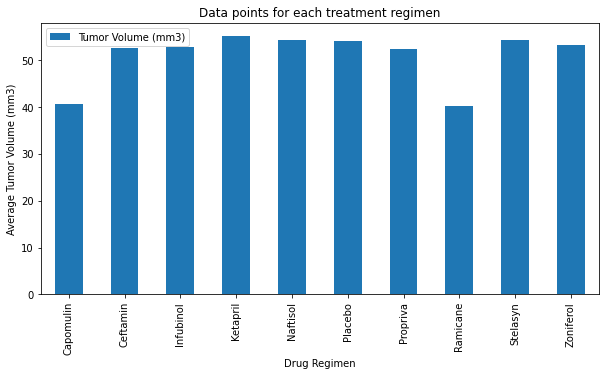

<Figure size 432x288 with 0 Axes>

In [31]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

summaryDF.plot(kind="bar", figsize=(10,5))
plt.title("Data points for each treatment regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
plt.tight_layout()



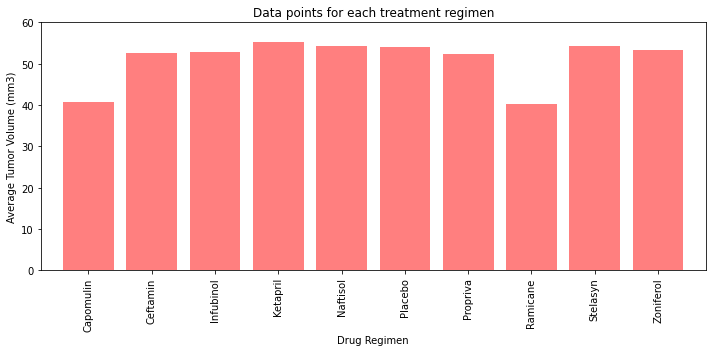

In [34]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
xAxis = np.arange(len(summaryDF))
tickLocations = [value for value in xAxis]

plt.figure(figsize=(10, 5))
plt.bar(xAxis, summaryDF["Tumor Volume (mm3)"], color='red', alpha=0.5)
plt.xticks(tickLocations, list(summaryDF.index), rotation="vertical") #, summaryDF["Drug Regimen"]
plt.xlim(-0.75, len(xAxis) - 0.25)
plt.ylim(0, 60)
plt.title("Data points for each treatment regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Average Tumor Volume (mm3)")
plt.tight_layout()
plt.show()

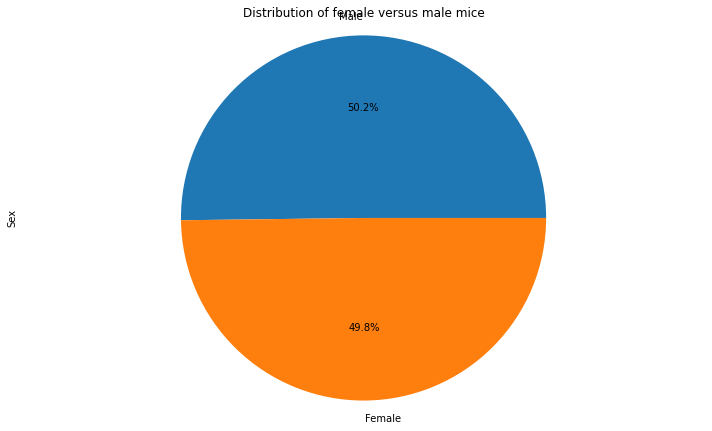

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

miceCount = mouseData["Sex"].value_counts()
plt.figure(figsize=(10,6))
miceCount.plot(kind="pie", autopct='%1.1f%%')
plt.tight_layout()
plt.axis("equal")
plt.title("Distribution of female versus male mice")
plt.tight_layout()
plt.show()

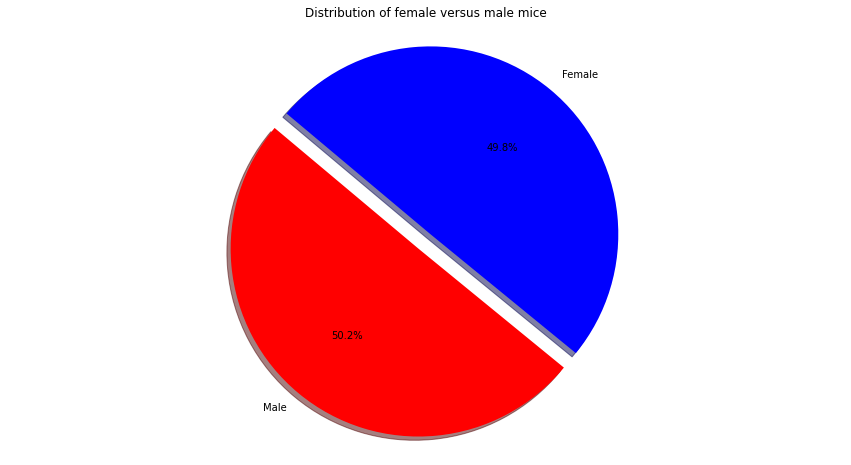

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

colors = ["red","blue"]
explode = (0.1,0)
plt.figure(figsize=(15,8))
plt.pie(miceCount.values, explode=explode, labels=miceCount.index.values, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.title("Distribution of female versus male mice")
plt.show()
        


## Quartiles, Outliers and Boxplots

In [49]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

regimenData = combineData[(combineData["Drug Regimen"] == "Capomulin") | 
                          (combineData["Drug Regimen"] == "Ramicane") | 
                          (combineData["Drug Regimen"] == "Infubinol") | 
                          (combineData["Drug Regimen"] == "Ceftamin")]

regimenData = regimenData[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
regimenData = regimenData.groupby(["Mouse ID", "Drug Regimen"])
regimenDF = regimenData["Tumor Volume (mm3)"].sum().to_frame()
regimenPlot = regimenDF["Tumor Volume (mm3)"]
regimenDF.head()

# quartile calculations
quartiles = regimenPlot.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume (mm3) is: 340.0010610275
The upper quartile of Tumor Volume (mm3) is: 449.98455965499994
The interquartile range of Tumor Volume (mm3) is: 109.98349862749996
The the median of Tumor Volume (mm3) is: 394.845840265 
Values below 175.02581308625005 could be outliers.
Values above 614.9598075962499 could be outliers.


In [53]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#mc_db=gd.index.levels[0]
#end_size=[]
    
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drugs:
    end_size.append(gd.loc[drug,timepoints.max()]['Tumor Volume (mm3)'])
    
end=pd.dataframe({"Size": end_size},index=drugs)

    
# add subset 
quartiles=end['Size'].quantile([.25,.5,.75])
    
lowerq=quartiles[0.25]
upperq=quartiles[0.75]
iqr=upperq-lowerq
    
print=(f"The lower quartile of the tumor size is: {lowerq}")
print=(f"The upper quartile of the tumor size is: {upperq}")
print=(f"The interquartile of the tumor size is: {iqr}")
print=(f"The median of the tumor size is: {quartiles[0.5]}")

    
# Determine outliers using upper and lower bounds
lower_bound=lowerq - (1.5*iqr)
upper_bound=upperq + (1.5*iqr)
print=(f"Values below {lower_bound} could be outliers.")
print=(f"Values above {upper_bound} could be outliers.")
    
#print outlier values
print("------------------")
print("Outliers are:")
end.loc[(end["Size"] > upper_bound)  |  (end["Size"]< lower_bound), "Size"]
           

NameError: name 'drugs' is not defined

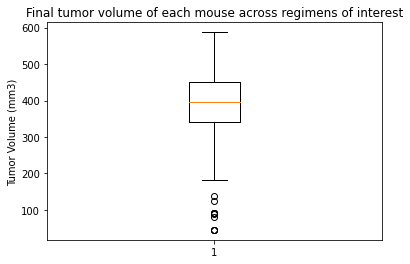

In [52]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final tumor volume of each mouse across regimens of interest')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(regimenPlot)
plt.show()

## Line and Scatter Plots

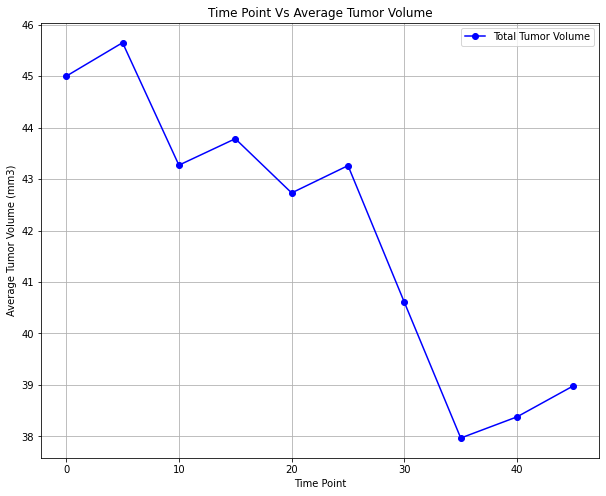

In [56]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

tumorData = combineData[(combineData["Drug Regimen"] == "Capomulin") & (combineData["Mouse ID"] == "b128")]
tumorData = tumorData.groupby(["Drug Regimen", "Timepoint"])
tumorDataDF = tumorData["Tumor Volume (mm3)"].mean().to_frame()
tumorIndexDataDF = tumorDataDF.unstack(0)
tumorPlotDF = tumorIndexDataDF["Tumor Volume (mm3)"]

xAxis = [0,5,10,15,20,25,30,35,40,45]
fig1,ax1=plt.subplots(figsize=(10,8))
tumorTotal, = plt.plot(xAxis, tumorPlotDF["Capomulin"], marker= "o", color="blue", label="Total Tumor Volume" )
plt.legend(handles=[tumorTotal], loc="best")
plt.title("Time Point Vs Average Tumor Volume")
# plt.xlim(-10, 50)
# plt.ylim(30, 50)
plt.xlabel("Time Point")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()




In [57]:
scatterData = combineData[(combineData["Drug Regimen"] == "Capomulin")]
scatterData = scatterData[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
groupByData = scatterData.groupby(["Mouse ID","Weight (g)"])
scatterDataDF = groupByData["Tumor Volume (mm3)"].mean().to_frame()
scatterDataDF = scatterDataDF.reset_index()
scatterDataDF.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


<Figure size 1800x1080 with 0 Axes>

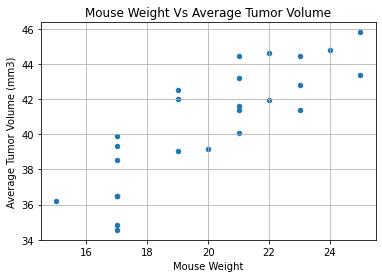

In [64]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.figure(figsize=(25,15))
scatterDataDF.plot(x="Weight (g)", y="Tumor Volume (mm3)", kind = "scatter", marker="o")

plt.title("Mouse Weight Vs Average Tumor Volume")
# plt.xlim(10, 25)
# plt.ylim(30, 50)
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()

## Correlation and Regression

In [61]:
# Calculate the correlation coefficient and linear regression model 
correlation = st.pearsonr(scatterDataDF["Weight (g)"], scatterDataDF["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


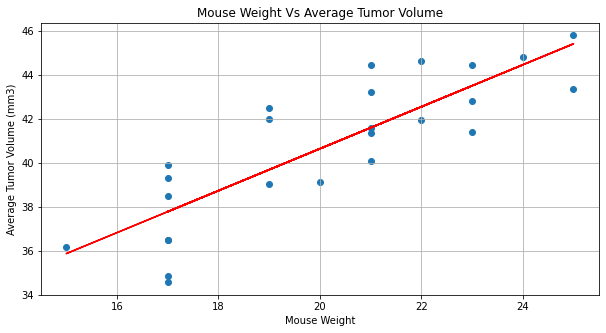

In [65]:
#for mouse weight and average tumor volume for the Capomulin regimen
x_values = scatterDataDF["Weight (g)"]
y_values = scatterDataDF["Tumor Volume (mm3)"]
plt.figure(figsize=(10,5))
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# plt.xlim(13, 26)
# plt.ylim(30, 50)
plt.title("Mouse Weight Vs Average Tumor Volume")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()


